In [40]:
import numpy as np
from skimage.filters import gaussian
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import pickle

In [122]:
df = pd.read_csv(r"sample_vids\output_new\0_\_signal_df.csv")

In [123]:
df_all_savinase = pd.read_csv(r"sample_vids\output_new\full_tracked\df.csv")

In [125]:
df_all_savinase[["x", "y"]].max()

x    63.427661
y    89.935919
dtype: float64

In [81]:
x_y_std = df_all_savinase.groupby("particle")[["x", "y"]].std()
standard_devs = np.sqrt(x_y_std["x"]**2 + x_y_std["y"]**2)

In [127]:
savinase_locs = df_all_savinase.groupby("particle")[["x", "y"]].mean().to_numpy()/0.18333

In [128]:
casein_locs = df[~df["particle"].duplicated()][["x", "y"]].to_numpy()

In [129]:
sav2 = np.sum(savinase_locs**2, axis = 1)
cas2 = np.sum(casein_locs**2, axis = 1)
savcas = np.matmul(savinase_locs, casein_locs.T)
sav2 = sav2.reshape(-1, 1)
dists = np.sqrt(sav2 - 2*savcas + cas2)

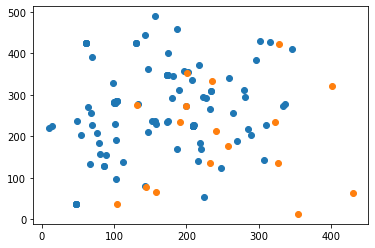

In [130]:
plt.plot(savinase_locs[:, 0], savinase_locs[:, 1], "o")
plt.plot(casein_locs[:, 0], casein_locs[:, 1], "o")

In [132]:
closest_caseins = dists.argmin(axis = 1)

In [147]:
(dists[np.arange(len(closest_caseins)), closest_caseins] < 5)

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [131]:
dists.min(axis = 1)

array([ 20.83470509,  19.84589805,  65.95334731,  25.47841924,
         1.41199589,  49.88777519,  25.36849096,  56.8203746 ,
        55.26070852,  54.13278212,  27.40635478,  57.01596773,
        28.60119448,  56.84994009,  20.12014278,  28.64774784,
        56.66867267,  56.63133628,  21.56862654,  49.24342322,
        19.77520152,  91.78388626,  28.69795141,  19.96711038,
        24.20231352, 134.39686889,  56.84676361,  13.53066584,
        17.51669886, 106.59142543,  28.60318178,   1.00081291,
       100.3077549 , 143.05962035,  19.89746821,  99.97869346,
        26.27284725,  19.75398216,  94.69879161, 100.2234441 ,
        86.73086804,  19.90288457,  41.18126213,  20.02514054,
        32.22731919,  19.96233624,  39.10126695, 107.03109582,
        14.54015275,  48.74361812,  26.8530401 ,  20.68760326,
         2.82286856,  19.92836866,  35.53380765, 107.68959244,
        54.69824779,  49.26374711,  22.05204531,  30.44339162,
        33.93162537,  30.41559959,  20.09864904,  46.53

In [51]:
df.groupby("particle").__iter__().__next__()

('0_0a58adee38994e61a3e3ddc886204b4c',
                y           x          mass      size       ecc       signal  \
 0      13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 15     13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 47     13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 63     13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 83     13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 ...          ...         ...           ...       ...       ...          ...   
 33930  13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 33948  13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 33967  13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 33981  13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 33982  13.426768  354.737702  13387.672688  1.804771  0.139063  2547.288857   
 